# STEM-DPC dataprosessering: notebook 3

Denne Jupyter notebooken bruker det "bakgrunnsfjernet" beam shift signalet, maske signalet og virtual bright field signalet til å lage en figur for å se hvordan dataprosesseringen gikk. Figurene blir lagret i `003_debug_plot`. De forskjellige subplottene viser:

- `Debug: VBF with mask` skal vise de områdene dere har nanomillet. Ergo de stedene som har blitt skutt på med Ga-ionene, og som ikke lenger er magnetiske. Det er ikke noe problem hvis masken ikke treffer overalt, men mesteparten av det magnetisk området (både utenfor og innafor strukturen) må være maskert. Denne er for å se at dataprosesseringen gikk greit.
- `DPC magnitude`: denne viser styrken til magnetfeltet, og kan si noe om feltet "ut-av-planet". Men den kan være litt vanskelig å bruke for små strukturer. Primært bruker vi denne til å se hvordan dataprosesseringen gikk.
- `DPC color`: denne viser styrken og retningen til magnetfeltet. Men denne kan ofte være vanskelig å bruke i praksis, spesielt hvis det er mye "bakgrunnsstøy" fra permalloy korn. Det er et par plotte-triks for gjøre dette bedre, se `plot_beam_shift_color`. Alternativt så anbefaler jeg å bruke `DPC x` og `DPC y`, siden disse er ofte mye bedre for visualisering.
- `DPC x` og `DPC y`: styrken til en av de magnetiske retningen. Anbefaler å bruke disse hvis `DPC color` ikke er så bra.

## Plotting av egne data

Merk at dere skal ikke bruke figurene fra denne Jupyter Notebook for egne figurer i prosjektrapporten. Dette fordi den har med mye mer enn dere trenger. For deres egne plot, så anbefaler jeg `DPC x`, `DPC y` og kanskje `DPC color` hvis det virker bra. Noen tips for dem:

#### DPC x og DPC y

I `imshow` for disse, så MÅ dere bruke `vmin` og `vmax` parameterne. Dette fordi dere får en god del "støy", på grunn av kornene. For disse dataene, så ser `-1.5` og `1.5` ut til å virke bra. Men det kan hende dere må endre denne for deres datasett.

```python
vmin, vmax = -1.5, 1.5
ax_dpc_x.imshow(s_bs_dpcx, extent=s_bs_dpcx.axes_manager.signal_extent, vmin=vmin, vmax=vmax)
```

#### plot_beam_shift_color

Her bruker dere `plot_beam_shift_color` funksjonen, og bruker `magnitude_limits` parameteren. For dataene har så ser `(-1, 1)` ut til å virke bra, men det kan hende dere må endre denne for deres datasett.

```python
from pyxem.utils.plotting import plot_beam_shift_color
plot_beam_shift_color(ax=ax_dpc, signal=s_bs_cor, autolim=False, magnitude_limits=(-1, 1), ax_indicator=False)
```

In [2]:
%matplotlib inline
import hyperspy.api as hs
import os
import numpy as np
import matplotlib.pyplot as plt
from pyxem.utils.plotting import plot_beam_shift_color
import glob
import re
from collections import defaultdict

# Plotte data

[['Bv5_deg-10.2', 'Bv5_deg-5.5', 'Bv5_deg0.1', 'Bv5_deg5.1', 'Bv5_deg10.1'], ['kompass_deg-10.2', 'kompass_deg-3', 'kompass_deg5'], ['Av5_deg-9.9', 'Av5_deg4.1', 'Av5_deg9.8'], ['Ev5_deg-10.2', 'Ev5_deg-5.2', 'Ev5_deg-0.3', 'Ev5_deg4.7', 'Ev5_deg9.9'], ['structure1neg5deg']]


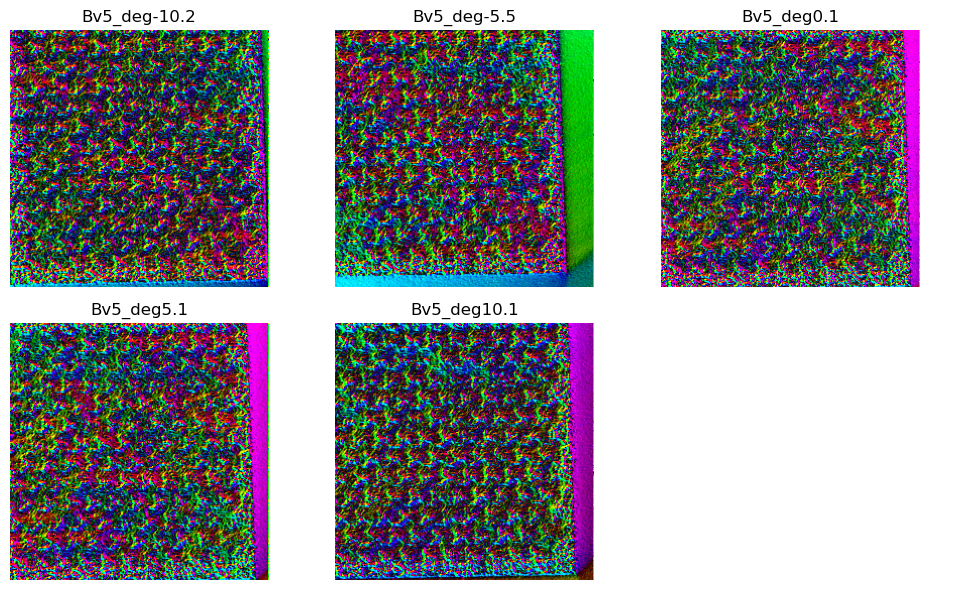

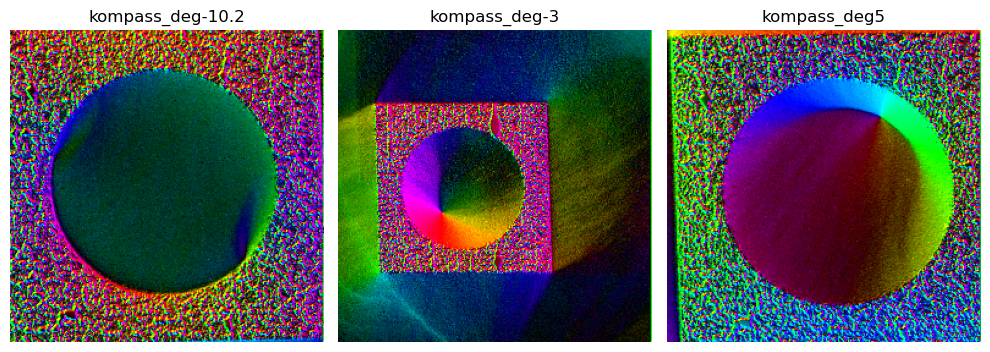

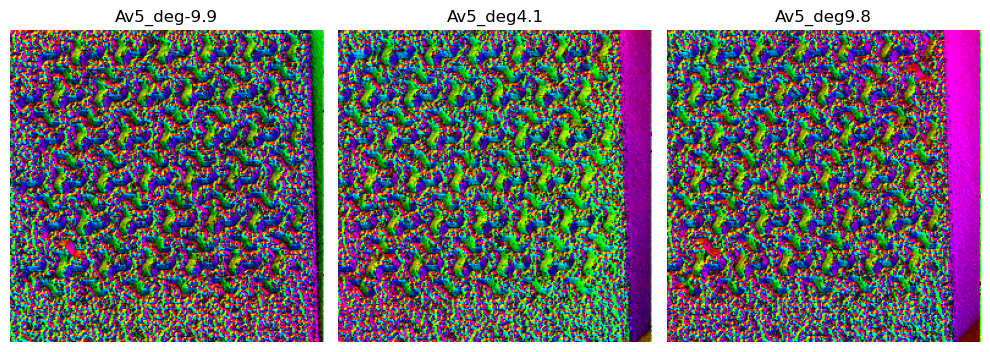

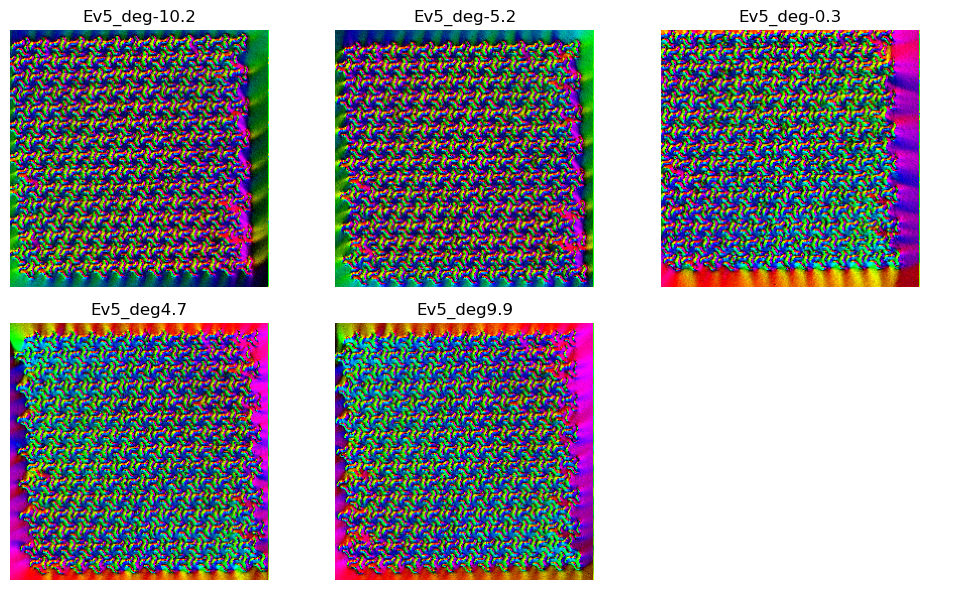

In [3]:
os.makedirs("004_dpc_plot", exist_ok=True)

# Define folder path and list files
folder_path = '002_cor_data/'
file_list = glob.glob(f"{folder_path}/*")

# Extract unique prefixes
prefixes = set()
for file in file_list:
    base_name = os.path.basename(file)
    prefix_parts = base_name.split('_')[:2]
    prefix = "_".join(prefix_parts)
    # Adjust specific cases
    if prefix.startswith('structure1neg5deg'):
        prefix = prefix_parts[0]
    prefixes.add(prefix)

# Group by the first three characters and sort by angle
def extract_angle(filename):
    match = re.search(r'_deg(-?\d+\.\d+|-?\d+)', filename)
    return float(match.group(1)) if match else 0

grouped_files = defaultdict(list)
for prefix in prefixes:
    grouped_files[prefix[:3]].append(prefix)

list_of_lists = [sorted(files, key=extract_angle) for files in grouped_files.values()]
print(list_of_lists)


# Iterate through each list of filenames in list_of_lists
for filename_list in list_of_lists:
    # Skip lists with only one file
    if len(filename_list) == 1:
         continue

    # Set up subplots based on the number of files in the list
    if len(filename_list) == 3:
        fig, axarr = plt.subplots(1, 3, figsize=(10, 6))
    elif len(filename_list) == 5:
        fig, axarr = plt.subplots(2, 3, figsize=(10, 6))
    else:
        continue

    # Define file path prefix and set up color limits
    vmin, vmax = -1.5, 1.5
    
    # Loop through each angle (file) in the current filename list
    for i, angle in enumerate(filename_list):
        # Define file prefix path
        filename_prefix = os.path.join(folder_path, angle)

        # Load the .hspy file
        s_bs_cor = hs.load(filename_prefix + "_bs_cor.hspy")

        # Select the appropriate axis
        if len(filename_list) == 3:
            ax_dpc = axarr[i]  # 1 row, 3 columns
        elif len(filename_list) == 5:
            ax_dpc = axarr[i // 3, i % 3]  # 2 rows, 3 columns
        

        # Plot data on the selected axis
        plot_beam_shift_color(ax=ax_dpc, signal=s_bs_cor, autolim=False, magnitude_limits=(vmin, vmax), ax_indicator=False)
        ax_dpc.set_title(f"{angle}")
    if len(filename_list) == 5:
            axarr[1,2].axis('off')
    # Adjust layout and save figure
    fig.tight_layout()
    output_filename = f"004_dpc_plot/{filename_list[0].split('_')[0]}_dpc_color.png"
    fig.savefig(output_filename, dpi=500,bbox_inches='tight')

## The other method

[['Bv5_deg-10.2', 'Bv5_deg-5.5', 'Bv5_deg0.1', 'Bv5_deg5.1', 'Bv5_deg10.1'], ['kompass_deg-10.2', 'kompass_deg-3', 'kompass_deg5'], ['Av5_deg-9.9', 'Av5_deg4.1', 'Av5_deg9.8'], ['Ev5_deg-10.2', 'Ev5_deg-5.2', 'Ev5_deg-0.3', 'Ev5_deg4.7', 'Ev5_deg9.9'], ['structure1neg5deg']]


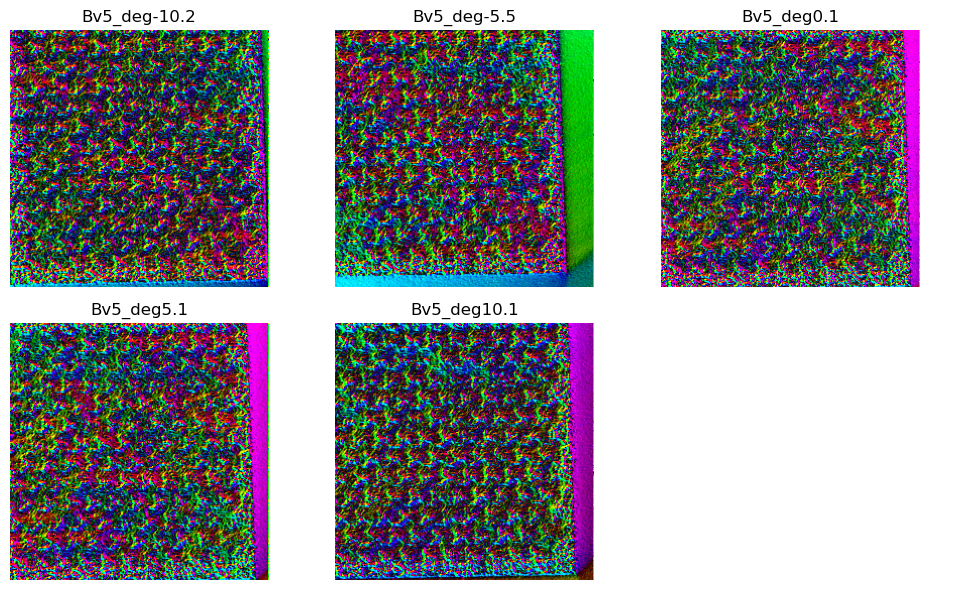

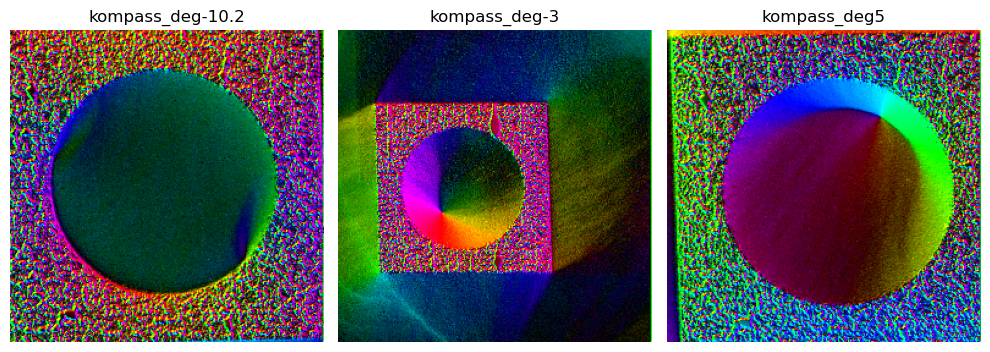

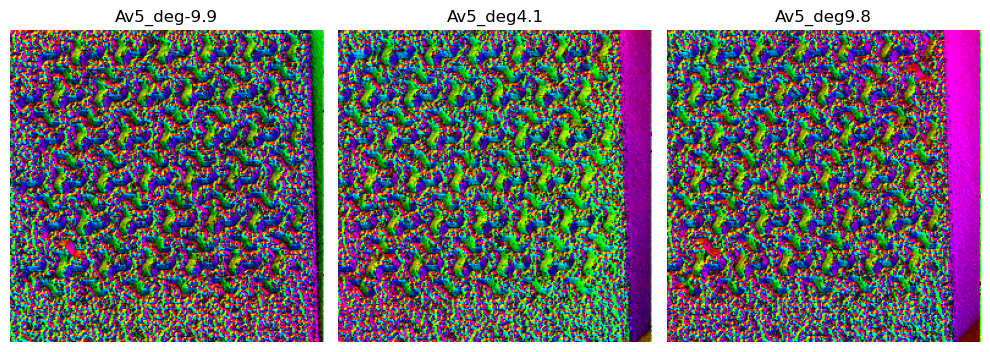

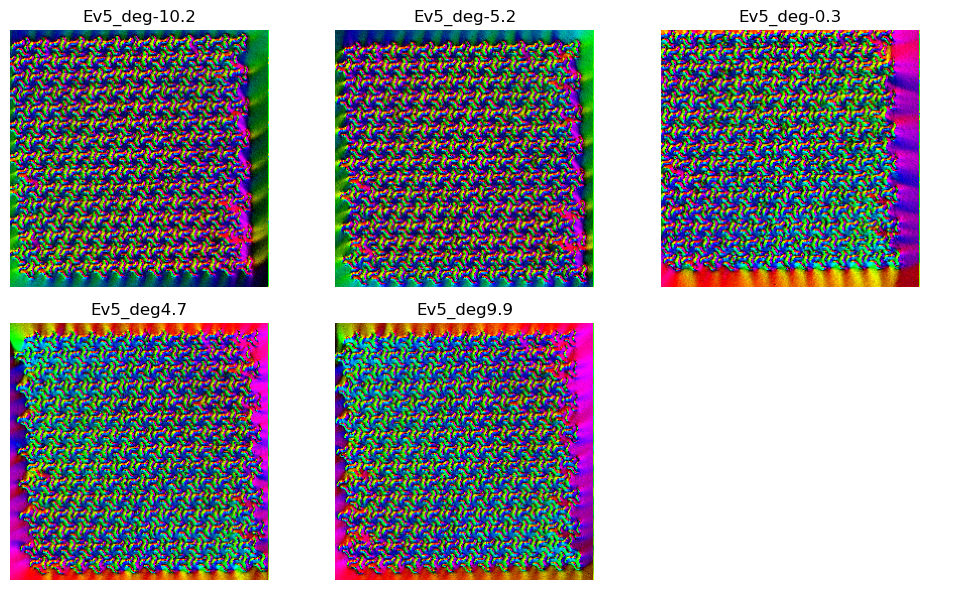

In [5]:
os.makedirs("004_dpc_plot_more", exist_ok=True)

# Define folder path and list files
folder_path = '002_cor_data/'
file_list = glob.glob(f"{folder_path}/*")

# Extract unique prefixes
prefixes = set()
for file in file_list:
    base_name = os.path.basename(file)
    prefix_parts = base_name.split('_')[:2]
    prefix = "_".join(prefix_parts)
    # Adjust specific cases
    if prefix.startswith('structure1neg5deg'):
        prefix = prefix_parts[0]
    prefixes.add(prefix)

# Group by the first three characters and sort by angle
def extract_angle(filename):
    match = re.search(r'_deg(-?\d+\.\d+|-?\d+)', filename)
    return float(match.group(1)) if match else 0

grouped_files = defaultdict(list)
for prefix in prefixes:
    grouped_files[prefix[:3]].append(prefix)

list_of_lists = [sorted(files, key=extract_angle) for files in grouped_files.values()]
print(list_of_lists)


# Iterate through each list of filenames in list_of_lists
for filename_list in list_of_lists:
    # Skip lists with only one file
    if len(filename_list) == 1:
         continue

    # Set up subplots based on the number of files in the list
    if len(filename_list) == 3:
        fig, axarr = plt.subplots(1, 3, figsize=(10, 6))
    elif len(filename_list) == 5:
        fig, axarr = plt.subplots(2, 3, figsize=(10, 6))
    else:
        continue

    # Define file path prefix and set up color limits
    vmin, vmax = -1.5, 1.5
    
    # Loop through each angle (file) in the current filename list
    for i, angle in enumerate(filename_list):
        # Define file prefix path
        filename_prefix = os.path.join(folder_path, angle)

        # Load the .hspy file
        s_bs_cor = hs.load(filename_prefix + "_bs_cor.hspy")

        # Select the appropriate axis
        if len(filename_list) == 3:
            ax_dpc = axarr[i]  # 1 row, 3 columns
        elif len(filename_list) == 5:
            ax_dpc = axarr[i // 3, i % 3]  # 2 rows, 3 columns
        

        # Plot data on the selected axis
        plot_beam_shift_color(ax=ax_dpc, signal=s_bs_cor, autolim=False, magnitude_limits=(vmin, vmax), ax_indicator=False)
        ax_dpc.set_title(f"{angle}")
    if len(filename_list) == 5:
            axarr[1,2].axis('off')
    # Adjust layout and save figure
    fig.tight_layout()
    output_filename = f"004_dpc_plot/{filename_list[0].split('_')[0]}_dpc_color_more.png"
    fig.savefig(output_filename, dpi=500,bbox_inches='tight')